In [1]:
### 
### Import required libraries
###

import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = (30.0, 15.0)


import operator
import datetime
import re
import random

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from xgboost import XGBRegressor

In [6]:
###
### Read Data From previously saved dataframe
###

df = pd.read_csv('../data/bitstamp_minute_data.csv', sep=',')
print df.shape
df.sort_values(by=['year', 'month', 'day_of_month', 'hour'], inplace=True)
df.head()

(3161057, 17)


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,datetime,datetime_pandas,day_of_month,month,year,weekday,week,hour,minute
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31 07:52:00,2011-12-31 07:52:00,31,12,2011,5,52,7,52
1,1325317980,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31 07:53:00,2011-12-31 07:53:00,31,12,2011,5,52,7,53
2,1325318040,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31 07:54:00,2011-12-31 07:54:00,31,12,2011,5,52,7,54
3,1325318100,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31 07:55:00,2011-12-31 07:55:00,31,12,2011,5,52,7,55
4,1325318160,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31 07:56:00,2011-12-31 07:56:00,31,12,2011,5,52,7,56


In [7]:
print df.columns.values
df.sort_values(by='Timestamp', inplace=True)
features = ['Open', 'High', 'Low', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price', 'day_of_month', 'month', 'year', 'weekday', 'week', 'hour', 'minute', 'Close']
hour_features = ['Open', 'High', 'Low', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price', 'day_of_month', 'month', 'year', 'weekday', 'week', 'hour', 'Close']
print features
print df.shape

['Timestamp' 'Open' 'High' 'Low' 'Close' 'Volume_(BTC)'
 'Volume_(Currency)' 'Weighted_Price' 'datetime' 'datetime_pandas'
 'day_of_month' 'month' 'year' 'weekday' 'week' 'hour' 'minute']
['Open', 'High', 'Low', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price', 'day_of_month', 'month', 'year', 'weekday', 'week', 'hour', 'minute', 'Close']
(3161057, 17)


In [8]:
###
### Date generation
###

df['datetime_pandas'] = pd.to_datetime(df['datetime_pandas'])
df['Date'] = df['datetime_pandas'].apply(lambda x: x.date())
df['Date'] = pd.to_datetime(df['Date'])
df = df[df['Date']<'2018-01-01']
del df['Timestamp']
del df['datetime']
del df['datetime_pandas']
df.tail(30)

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,day_of_month,month,year,weekday,week,hour,minute,Date
3150946,13950.00,13950.00,13930.00,13930.00,1.683328,23473.988712,13944.990705,31,12,2017,6,52,23,30,2017-12-31
3150947,13930.00,13951.59,13930.00,13951.59,4.376772,61024.849398,13942.891170,31,12,2017,6,52,23,31,2017-12-31
3150948,13950.06,13960.00,13945.21,13960.00,14.119377,197096.693070,13959.304855,31,12,2017,6,52,23,32,2017-12-31
3150949,13970.07,13970.07,13931.34,13957.10,0.309732,4318.640489,13943.146579,31,12,2017,6,52,23,33,2017-12-31
3150950,13957.19,13957.19,13957.19,13957.19,1.280621,17873.872569,13957.190000,31,12,2017,6,52,23,34,2017-12-31
3150951,13957.19,13993.92,13930.00,13988.34,15.435691,215218.037020,13942.883282,31,12,2017,6,52,23,35,2017-12-31
3150952,13980.80,13980.80,13963.21,13963.89,1.825191,25487.410961,13964.245238,31,12,2017,6,52,23,36,2017-12-31
3150953,13999.91,13999.91,13963.22,13987.68,0.587565,8217.678618,13985.980690,31,12,2017,6,52,23,37,2017-12-31
3150954,13931.60,13999.81,13931.60,13999.81,4.161676,58148.432686,13972.358169,31,12,2017,6,52,23,38,2017-12-31
3150955,13932.16,13999.98,13932.16,13957.50,3.054607,42680.903879,13972.634618,31,12,2017,6,52,23,39,2017-12-31


## Hour-based Data Generation Process

In [9]:
open_df = df[df['minute']==0][['Open', 'Date', 'hour']]
close_df = df[df['minute']==59][['Close', 'Date', 'hour']]
close_df.tail()

,Close,Date,hour
3150735,13949.61,2017-12-31,19
3150795,14111.28,2017-12-31,20
3150855,13977.47,2017-12-31,21
3150915,13937.95,2017-12-31,22
3150975,13880.00,2017-12-31,23


In [10]:
high_df = df[['High', 'Date', 'hour']].groupby(['Date', 'hour']).max()
high_df.reset_index(inplace=True)
low_df = df[['Low', 'Date', 'hour']].groupby(['Date', 'hour']).min()
low_df.reset_index(inplace=True)
low_df.tail()

,Date,hour,Low
52513,2017-12-31,19,13804.25
52514,2017-12-31,20,13948.95
52515,2017-12-31,21,13944.64
52516,2017-12-31,22,13803.20
52517,2017-12-31,23,13807.86


In [11]:
volume_df = df[['Volume_(BTC)','Volume_(Currency)', 'Date', 'hour']].groupby(['Date', 'hour']).sum()
volume_df.reset_index(inplace=True)
volume_df.tail()

,Date,hour,Volume_(BTC),Volume_(Currency)
52513,2017-12-31,19,207.963504,2.893771e+06
52514,2017-12-31,20,362.943308,5.131342e+06
52515,2017-12-31,21,263.540150,3.692298e+06
52516,2017-12-31,22,267.845331,3.733251e+06
52517,2017-12-31,23,223.238758,3.108604e+06


In [12]:
wprice_df = df[['Weighted_Price', 'day_of_month', 'month', 'year', 'weekday', 'week', 'Date', 'hour']].groupby(['day_of_month', 'month', 'year', 'weekday', 'week', 'Date', 'hour']).mean()
wprice_df.reset_index(inplace=True)
wprice_df.tail()

,day_of_month,month,year,weekday,week,Date,hour,Weighted_Price
52513,31,12,2017,6,52,2017-12-31,19,13929.576077
52514,31,12,2017,6,52,2017-12-31,20,14085.825194
52515,31,12,2017,6,52,2017-12-31,21,14003.624168
52516,31,12,2017,6,52,2017-12-31,22,13946.834307
52517,31,12,2017,6,52,2017-12-31,23,13914.049529


In [13]:
hour_df = pd.merge(wprice_df, volume_df, on=['Date', 'hour'])
print hour_df.shape
hour_df = pd.merge(hour_df, high_df, on=['Date', 'hour'])
print hour_df.shape
hour_df = pd.merge(hour_df, low_df, on=['Date', 'hour'])
print hour_df.shape
hour_df = pd.merge(hour_df, open_df, on=['Date', 'hour'])
print hour_df.shape
hour_df = pd.merge(hour_df, close_df, on=['Date', 'hour'])
print hour_df.shape
hour_df.tail()

(52518, 10)
(52518, 11)
(52518, 12)
(52516, 13)
(52515, 14)


,day_of_month,month,year,weekday,week,Date,hour,Weighted_Price,Volume_(BTC),Volume_(Currency),High,Low,Open,Close
52510,31,12,2017,6,52,2017-12-31,19,13929.576077,207.963504,2.893771e+06,14049.78,13804.25,13840.53,13949.61
52511,31,12,2017,6,52,2017-12-31,20,14085.825194,362.943308,5.131342e+06,14296.06,13948.95,13949.65,14111.28
52512,31,12,2017,6,52,2017-12-31,21,14003.624168,263.540150,3.692298e+06,14166.00,13944.64,14111.20,13977.47
52513,31,12,2017,6,52,2017-12-31,22,13946.834307,267.845331,3.733251e+06,14050.00,13803.20,14024.70,13937.95
52514,31,12,2017,6,52,2017-12-31,23,13914.049529,223.238758,3.108604e+06,13999.98,13807.86,13925.00,13880.00


In [15]:
hour_df = hour_df.sort_values(by=['Date', 'hour'], ascending=True)
hour_df.reset_index(inplace=True)
hour_df = hour_df[hour_features]
print hour_df.shape

hour_df.tail()

(52515, 13)


,Open,High,Low,Volume_(BTC),Volume_(Currency),Weighted_Price,day_of_month,month,year,weekday,week,hour,Close
52510,13840.53,14049.78,13804.25,207.963504,2.893771e+06,13929.576077,31,12,2017,6,52,19,13949.61
52511,13949.65,14296.06,13948.95,362.943308,5.131342e+06,14085.825194,31,12,2017,6,52,20,14111.28
52512,14111.20,14166.00,13944.64,263.540150,3.692298e+06,14003.624168,31,12,2017,6,52,21,13977.47
52513,14024.70,14050.00,13803.20,267.845331,3.733251e+06,13946.834307,31,12,2017,6,52,22,13937.95
52514,13925.00,13999.98,13807.86,223.238758,3.108604e+06,13914.049529,31,12,2017,6,52,23,13880.00


In [16]:
###
### convert series to supervised learning
###

def series_to_supervised(data, n_in=1, n_out=1):
    n_vars = 1 if type(data) is list else data.shape[1]
    temp_df = pd.DataFrame(data)
    cols, names = list(), list()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(temp_df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(temp_df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    return agg

In [17]:
# ensure all data is float
values = hour_df.values.astype('float32')

# frame as supervised learning
reframed = series_to_supervised(values, 3, 1)
print reframed.shape
reframed.tail()

(52515, 52)


,var1(t-3),var2(t-3),var3(t-3),var4(t-3),var5(t-3),var6(t-3),var7(t-3),var8(t-3),var9(t-3),var10(t-3),...,var4(t),var5(t),var6(t),var7(t),var8(t),var9(t),var10(t),var11(t),var12(t),var13(t)
52510,13351.009766,14187.570312,13301.780273,1673.169922,23241072.0,13894.583984,31.0,12.0,2017.0,6.0,...,207.963501,2893771.00,13929.576172,31.0,12.0,2017.0,6.0,52.0,19.0,13949.610352
52511,14036.400391,14081.700195,13768.799805,566.864624,7906635.5,13947.277344,31.0,12.0,2017.0,6.0,...,362.943298,5131341.50,14085.825195,31.0,12.0,2017.0,6.0,52.0,20.0,14111.280273
52512,13987.580078,14006.330078,13777.559570,217.305984,3019932.5,13912.181641,31.0,12.0,2017.0,6.0,...,263.540161,3692298.00,14003.624023,31.0,12.0,2017.0,6.0,52.0,21.0,13977.469727
52513,13840.530273,14049.780273,13804.250000,207.963501,2893771.0,13929.576172,31.0,12.0,2017.0,6.0,...,267.845337,3733250.75,13946.833984,31.0,12.0,2017.0,6.0,52.0,22.0,13937.950195
52514,13949.650391,14296.059570,13948.950195,362.943298,5131341.5,14085.825195,31.0,12.0,2017.0,6.0,...,223.238754,3108604.00,13914.049805,31.0,12.0,2017.0,6.0,52.0,23.0,13880.000000


In [18]:
###
### Remove the feature columns which are not available while future prediction
###

for col in reframed.columns:
    if "(t)" in col:
        if col in ['var1(t)', 'var2(t)', 'var3(t)', 'var4(t)', 'var5(t)', 'var6(t)']:
            del reframed[col]

print reframed.shape
reframed.fillna(0, inplace=True)
reframed.tail()

(52515, 46)


,var1(t-3),var2(t-3),var3(t-3),var4(t-3),var5(t-3),var6(t-3),var7(t-3),var8(t-3),var9(t-3),var10(t-3),...,var11(t-1),var12(t-1),var13(t-1),var7(t),var8(t),var9(t),var10(t),var11(t),var12(t),var13(t)
52510,13351.009766,14187.570312,13301.780273,1673.169922,23241072.0,13894.583984,31.0,12.0,2017.0,6.0,...,52.0,18.0,13808.190430,31.0,12.0,2017.0,6.0,52.0,19.0,13949.610352
52511,14036.400391,14081.700195,13768.799805,566.864624,7906635.5,13947.277344,31.0,12.0,2017.0,6.0,...,52.0,19.0,13949.610352,31.0,12.0,2017.0,6.0,52.0,20.0,14111.280273
52512,13987.580078,14006.330078,13777.559570,217.305984,3019932.5,13912.181641,31.0,12.0,2017.0,6.0,...,52.0,20.0,14111.280273,31.0,12.0,2017.0,6.0,52.0,21.0,13977.469727
52513,13840.530273,14049.780273,13804.250000,207.963501,2893771.0,13929.576172,31.0,12.0,2017.0,6.0,...,52.0,21.0,13977.469727,31.0,12.0,2017.0,6.0,52.0,22.0,13937.950195
52514,13949.650391,14296.059570,13948.950195,362.943298,5131341.5,14085.825195,31.0,12.0,2017.0,6.0,...,52.0,22.0,13937.950195,31.0,12.0,2017.0,6.0,52.0,23.0,13880.000000


In [20]:
###
### Train Test Data generation
### Last 100 hours of data is taken as Test set
###


values = reframed.values
print values.shape

# split into train and test sets
train = values[25000:52350, :]
test = values[52350:52450, :]
valid = values[np.random.choice(values[40000:].shape[0], 5000, replace=False), :]

print type(values)
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
valid_X, valid_y = valid[:, :-1], valid[:, -1]

print train_X.shape, train_y.shape, test_X.shape, test_y.shape, valid_X.shape, valid_y.shape

(52515, 46)
<type 'numpy.ndarray'>
(27350, 45) (27350,) (100, 45) (100,) (5000, 45) (5000,)


In [21]:
###
### Basic XGB model with sklearn api is trained
###

model = XGBRegressor(n_estimators=500, max_depth=6, learning_rate=0.05, silent=False)
model.fit(train_X, train_y)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=False, subsample=1)

Test RMSE: 405.047


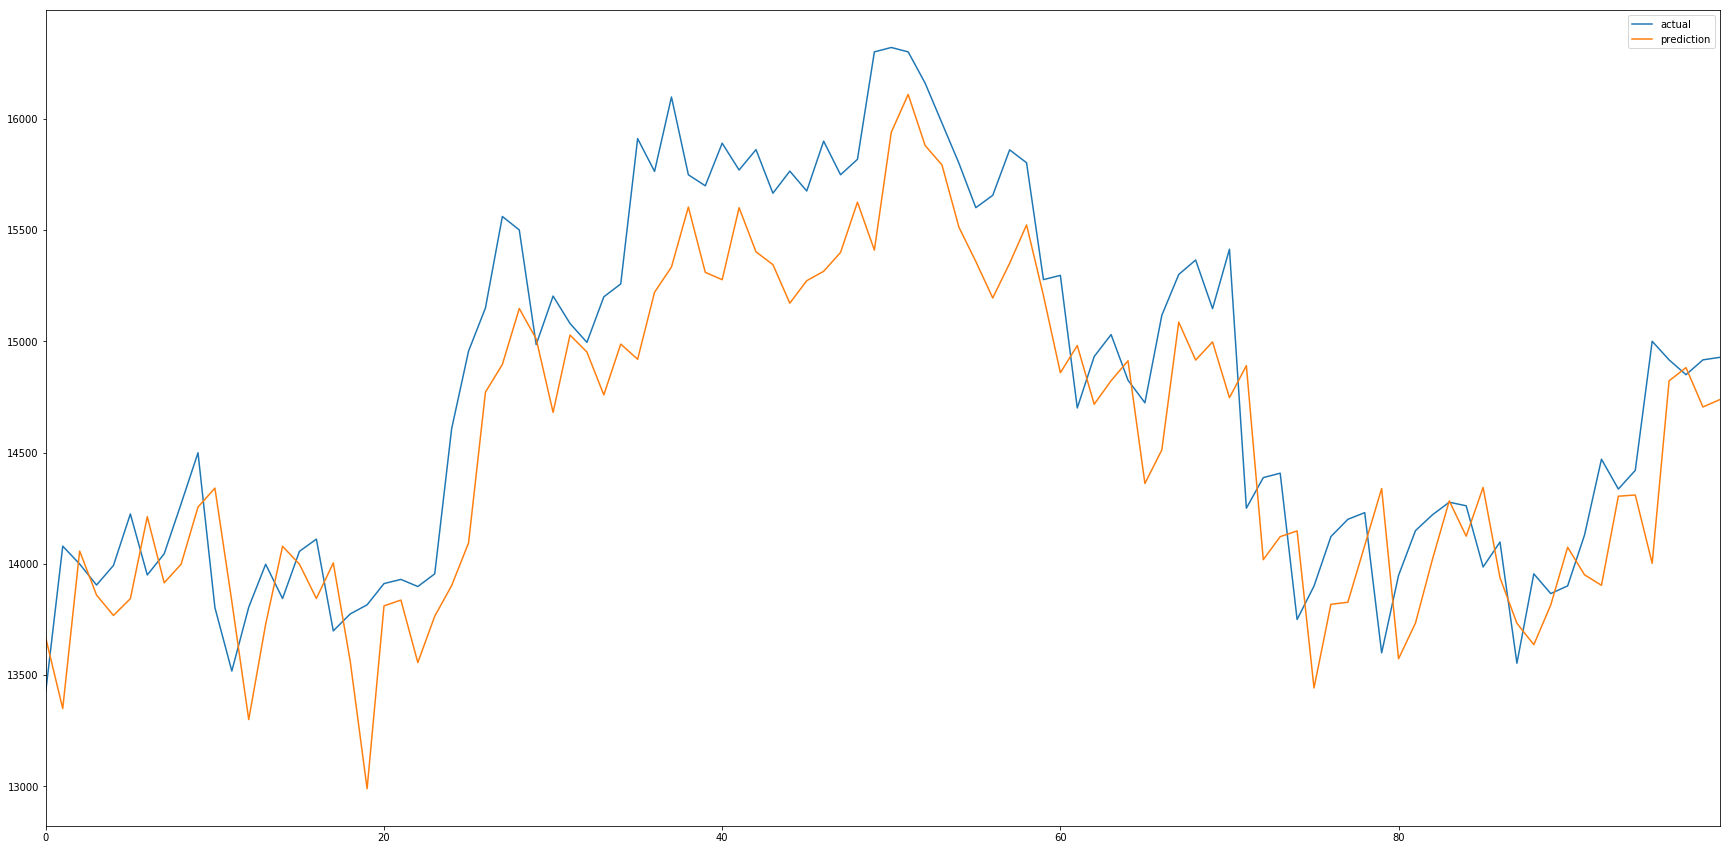

In [22]:
# make a prediction
yhat = model.predict(test_X)

# calculate RMSE
rmse = np.sqrt(mean_squared_error(test_y, yhat))
print 'Test RMSE: %.3f' % rmse

result = pd.DataFrame()
result['actual'] = test_y
result['prediction'] = yhat
result.plot()

In [23]:
###
### To compare correct prediction of next Ups and Down data is prepared
### If next "Closing Price" value is > previous "Closing Price" value then it is marked as 1 else 0.
###

binary_op_actual, binary_op_pred = [], []
prev_val = 0
for i, val in enumerate(result['actual'].values):
    if i > 0:
        if val > prev_val:
            binary_op_actual.append(1)
        else:
            binary_op_actual.append(0)
    prev_val = val
        
prev_val = 0
for i, val in enumerate(result['prediction'].values):
    if i > 0:
        if val > prev_val:
            binary_op_pred.append(1)
        else:
            binary_op_pred.append(0)
    prev_val = val
        
print len(binary_op_actual), len(binary_op_pred)
print binary_op_actual[:10], binary_op_pred[:10]

99 99
[1, 0, 0, 1, 1, 0, 1, 1, 1, 0] [0, 1, 0, 0, 1, 1, 0, 1, 1, 1]


In [24]:
###
### Now problem is converted to classification of 1 and 0 class effectively showing Ups and Downs from previous entry.
###

print classification_report(binary_op_actual, binary_op_pred)

             precision    recall  f1-score   support

          0       0.34      0.38      0.36        40
          1       0.55      0.51      0.53        59

avg / total       0.46      0.45      0.46        99

